<a href="https://colab.research.google.com/github/BernasconiLorenzo06/geopandas_nuovo/blob/main/GEOPANDAS_sjoin_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# caricare il geodataframe delle piste ciclabili bike_ciclabili.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install geopandas
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [ ]:
!pip install contextily
import contextily

In [9]:
piste_ciclabili = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip")
piste_ciclabili3857 = piste_ciclabili.to_crs(epsg=3857)
piste_ciclabili3857.head()

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,NaN,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (1022692.072 5697557.445, 1022687.6..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,NaN,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (1028805.815 5690949.659, 1028817.1..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,NaN,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (1028568.954 5691051.732, 1028581.8..."
3,9004,3377,VIA GIACOMO MEDICI DEL VASCELLO,NaN,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,6.0,"LINESTRING (1028483.188 5691457.031, 1028479.0..."
4,9005,3377,VIA GIACOMO MEDICI DEL VASCELLO,NaN,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,28.0,"LINESTRING (1028581.088 5691056.943, 1028574.9..."


In [ ]:
fontanelle = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Fontanelle.zip")
fontanelle3857 = fontanelle.to_crs(epsg=3857)
fontanelle3857.head()

In [15]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
quartieri3857 = quartieri.to_crs(epsg=3857)
quartieri3857.head()

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((1019043.223 5690701.816, 1019040.205..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((1013700.561 5699020.396, 1013336.225..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((1019281.533 5698653.937, 1019379.177..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((1020580.947 5704131.420, 1020451.234..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((1024184.198 5705106.594, 1024200.172..."


visualizza la mappa dei quartieri e delle piste ciclabili

In [ ]:
ax = quartieri3857.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
piste_ciclabili3857.plot(ax=ax,edgecolor =  "blue", facecolor = "None",figsize=(12,6))#se viene foto assurdaa colpa crs
contextily.add_basemap(ax)

creare una geoserie con le informazioni sulla ciclabile di via Melchiorre Gioia e visualizzarla

In [ ]:
PMG = piste_ciclabili3857[piste_ciclabili3857["anagrafica"].str.contains("VIA MELCHIORRE GIOIA")]
ax = PMG.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
contextily.add_basemap(ax)

trovare tutti i quartieri attraversati da questa pista ciclabile

In [18]:
quartiereGioia = quartieri3857[quartieri3857.intersects(PMG.unary_union)]
quartiereGioia

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
8,11,ISOLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5082.707418,1.322887e+06,97,"POLYGON ((1024268.959 5698936.095, 1024235.017..."
17,13,GRECO - SEGNANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7468.531297,1.768603e+06,106,"POLYGON ((1025497.262 5702124.897, 1025502.138..."
56,12,MACIACHINI - MAGGIOLINA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.190756,1.674918e+06,145,"POLYGON ((1022457.523 5701463.277, 1022718.771..."
68,9,PORTA GARIBALDI - PORTA NUOVA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4451.925002,7.856384e+05,157,"POLYGON ((1023996.242 5698175.854, 1023956.540..."
72,10,STAZIONE CENTRALE - PONTE SEVESO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7503.351720,1.556019e+06,161,"POLYGON ((1026182.805 5700535.584, 1026229.157..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((1023209.291 5695669.544, 1023143.444..."


visualizzare su una mappa la pista ciclabile e i quartieri attraversati (utilizzare i colori presenti nell'esempio)

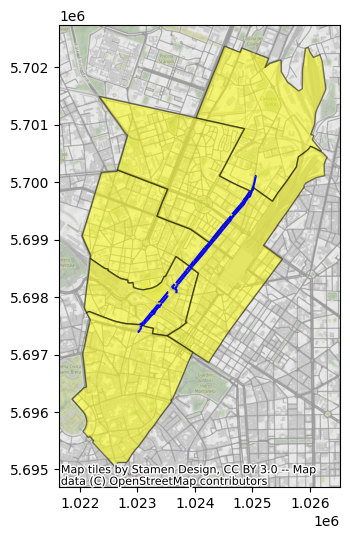

In [19]:
ax = quartiereGioia.plot(edgecolor =  "k", facecolor = "yellow",figsize=(12,6), alpha = 0.5)
PMG.plot(ax=ax,edgecolor =  "blue", facecolor = "None",figsize=(12,6))
contextily.add_basemap(ax)

visualizzare su una mappa le fontanelle e i quartieri in cui si trovano.
non visualizzare i quartieri in cui non ci sono fontanelle

In [ ]:
fontaneQuartieri = quartieri3857[quartieri3857.intersects(fontanelle3857.unary_union)]
ax = fontaneQuartieri.plot(edgecolor =  "k", facecolor = "None",figsize=(12,6))
fontanelle3857.plot(ax=ax,color = "red",figsize=(12,6),markersize = 1)
contextily.add_basemap(ax)

colorare i quartieri in modo proporzionale al numero di fontanelle presenti (giallo molte fontanelle, blu scuro poche fontanelle)
non evidenziare i quartieri senza fontanelle

In [ ]:
joined1 = geopandas.sjoin(fontanelle3857,quartieri3857,predicate = "intersects",how = "left")#

In [ ]:
joined = geopandas.sjoin(fontanelle3857,fontaneQuartieri,how = "left")#2 geodataframe da unire
joined.head()

In [ ]:
fontaneInQuartieri = joined.groupby("NIL")[["Licenza"]].count().reset_index()
fontaneInQuartieri

In [ ]:
finale = fontaneQuartieri.merge(fontaneInQuartieri, on = "NIL")
finale

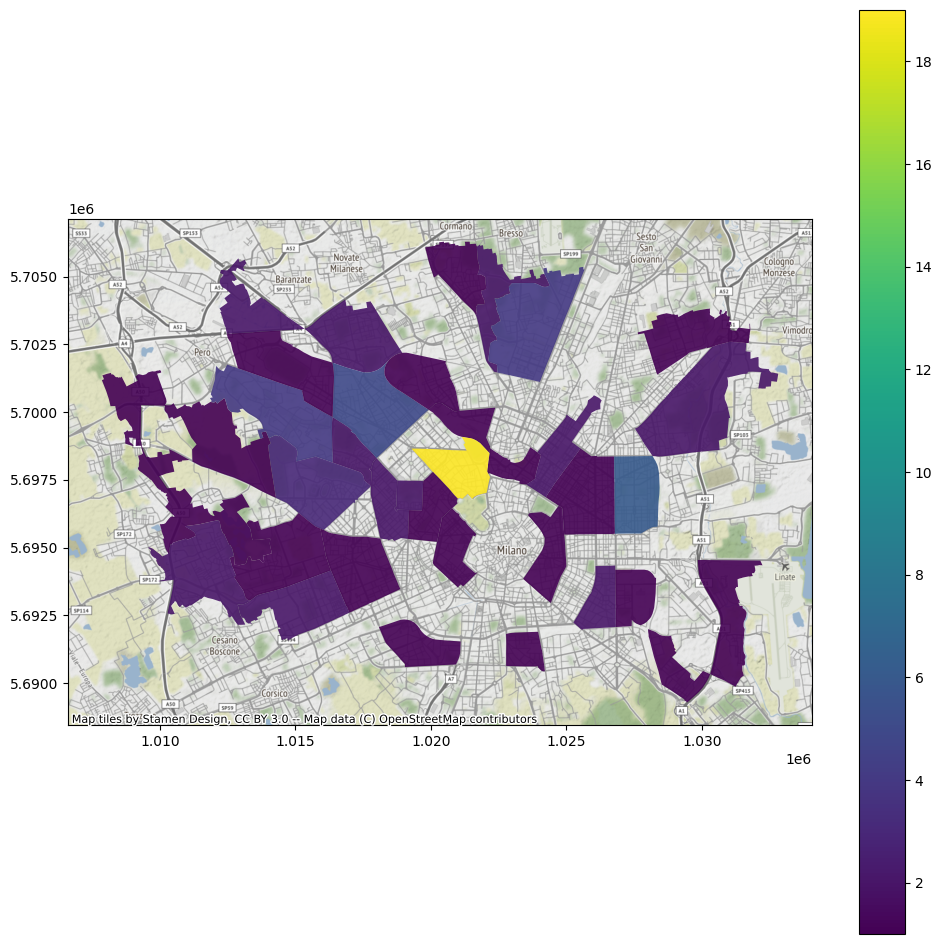

In [42]:
ax = finale.plot(figsize = (12,12),column = "Licenza", legend = True,alpha = 0.9)
contextily.add_basemap(ax)